In [24]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mpl_finance import candlestick_ohlc

In [728]:
df = pd.read_csv(r'SBER_080101_181231.txt')
df  =df.drop(['<TIME>','<VOL>'], axis = 1)
df['<DATE>'] = pd.to_datetime(df['<DATE>'],format='%Y%m%d')
df.index = df['<DATE>']
df.head()
# plt.title('График')
# plt.plot(df['<CLOSE>'])
# plt.show()

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
<DATE>,,,,,
2008-01-09,2008-01-09,101.99,103.70,100.72,101.85
2008-01-10,2008-01-10,102.07,103.81,101.53,103.53
2008-01-11,2008-01-11,103.60,105.45,102.86,104.70
2008-01-14,2008-01-14,104.28,105.30,104.20,105.00
2008-01-15,2008-01-15,105.20,106.60,104.80,105.71


In [729]:
def getYears(df):#получает список уникальных годов за этот период
    years = list()
    for i in range(len(df)):
        years.append(df['<DATE>'][i].year)
    years = pd.Series(years)
    years = years.unique()
    return(years)

# ATR


Суть работы индикатора заключается в вычислении следующих операторов
 $ TR_{t_1}  = High_t - Low_t $,
 $ TR_{t_2} = |High_t - Close_{t-1}| $,
 
 $ TR_{t_3} = |Low_t - Close_{t-1}| $,
 после чего из этого выбирается максимальный показатель то есть $ TR_t = max(TR_{t_1},TR_{t_2},TR_{t_3}) $
 Сам же показатель ATR считается
 
 

Текущий ATR = [(Предыдущий ATR * 13)+Текущий TR]/14

# RSI

In [730]:
#предварительные расчеты и подготовка полей для заполнения
df['TR_1'] = df['<HIGH>'] - df['<LOW>']
df['TR_2'] = abs(df['<HIGH>'] - df['<CLOSE>'].shift(1))
df['TR_3'] = abs(df['<LOW>'] - df['<CLOSE>'].shift(1))
df['TR'] = df[['TR_1','TR_2','TR_3']].max(axis = 1)
df['ATR'] = pd.Series([0.0 for x in range(len(df.index))]) 
df['U'] = pd.Series([0.0 for x in range(len(df.index))])
df['D'] = pd.Series([0.0 for x in range(len(df.index))])
df['EMA_U'],df['EMA_D'],df['RS'],df['RSI'] = pd.Series([0.0 for x in range(len(df.index))]),pd.Series([0.0 for x in range(len(df.index))]),pd.Series([0.0 for x in range(len(df.index))]),pd.Series([0.0 for x in range(len(df.index))])
df['ATR'][0] = df['TR'][0]
df.head()

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,TR_1,TR_2,TR_3,TR,ATR,U,D,EMA_U,EMA_D,RS,RSI
<DATE>,,,,,,,,,,,,,,,,
2008-01-09,2008-01-09,101.99,103.70,100.72,101.85,2.98,NaN,NaN,2.98,2.98,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-10,2008-01-10,102.07,103.81,101.53,103.53,2.28,1.96,0.32,2.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-11,2008-01-11,103.60,105.45,102.86,104.70,2.59,1.92,0.67,2.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-14,2008-01-14,104.28,105.30,104.20,105.00,1.10,0.60,0.50,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-15,2008-01-15,105.20,106.60,104.80,105.71,1.80,1.60,0.20,1.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ввод количества периодов

In [731]:
n = int(input('Введите количество периодов(оптимальное 14): '))


Введите количество периодов(оптимальное 14): 14


In [733]:
#рассчеты показателей
for i in range(1,len(df)):
    df['ATR'][i] = (df['ATR'][i-1]*(n-1)+df['TR'][i])/n
    if (df['<CLOSE>'][i]<df['<CLOSE>'][i-1]):
        df['U'][i] = 0
        df['D'][i] = df['<CLOSE>'][i-1] - df['<CLOSE>'][i]
    else:
        df['U'][i] = df['<CLOSE>'][i] - df['<CLOSE>'][i-1]
        df['D'][i] = 0
df.head(15)
df['EMA_U'][1],df['EMA_D'][1] = df['U'][1],df['D'][1]
alpha = 2/(n+1)
for i in range(2,len(df)):
    df['EMA_U'][i] = alpha*df['U'][i]+(1-alpha)*df['EMA_U'][i-1]
    df['EMA_D'][i] = alpha*df['D'][i]+(1-alpha)*df['EMA_D'][i-1]
df['RS'] = df['EMA_U']/df['EMA_D']


df['RSI'] = 100 - 100/(1+df['RS'])
df['RSI_mean'] = df['RSI'].mean()
df['ATR_mean'] = df['ATR'].mean()
df.head()

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,TR_1,TR_2,TR_3,TR,ATR,U,D,EMA_U,EMA_D,RS,RSI,RSI_mean,ATR_mean
<DATE>,,,,,,,,,,,,,,,,,,
2008-01-09,2008-01-09,101.99,103.70,100.72,101.85,2.98,NaN,NaN,2.98,2.980000,NaN,NaN,NaN,NaN,NaN,NaN,52.06333,3.085441
2008-01-10,2008-01-10,102.07,103.81,101.53,103.53,2.28,1.96,0.32,2.28,2.930000,1.68,0.0,1.680000,0.0,inf,100.0,52.06333,3.085441
2008-01-11,2008-01-11,103.60,105.45,102.86,104.70,2.59,1.92,0.67,2.59,2.905714,1.17,0.0,1.612000,0.0,inf,100.0,52.06333,3.085441
2008-01-14,2008-01-14,104.28,105.30,104.20,105.00,1.10,0.60,0.50,1.10,2.776735,0.30,0.0,1.437067,0.0,inf,100.0,52.06333,3.085441
2008-01-15,2008-01-15,105.20,106.60,104.80,105.71,1.80,1.60,0.20,1.80,2.706968,0.71,0.0,1.340124,0.0,inf,100.0,52.06333,3.085441


In [734]:
# df_ATR = df.copy()
# years = getYears(df)

# for i in range(1):
#     cur_year = years[i]
#     condition = (df_ATR['<DATE>']<pd.to_datetime(cur_year+1,format='%Y')) & (df_ATR['<DATE>']>pd.to_datetime(cur_year,format='%Y'))
#     df_cur = df_ATR[condition].copy()
# #     ax[i].set(title = 'ATR {} года'.format(years[i]),xticks = df_cur['<DATE>'],yticks = df_cur['ATR']) 
# #     ax.plt.plot(df_cur['ATR'])
# plt.show()

# Ввод года 

Введите год(доступны [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]): 2018
Год, квартал месяц?[1/2/3]: 1


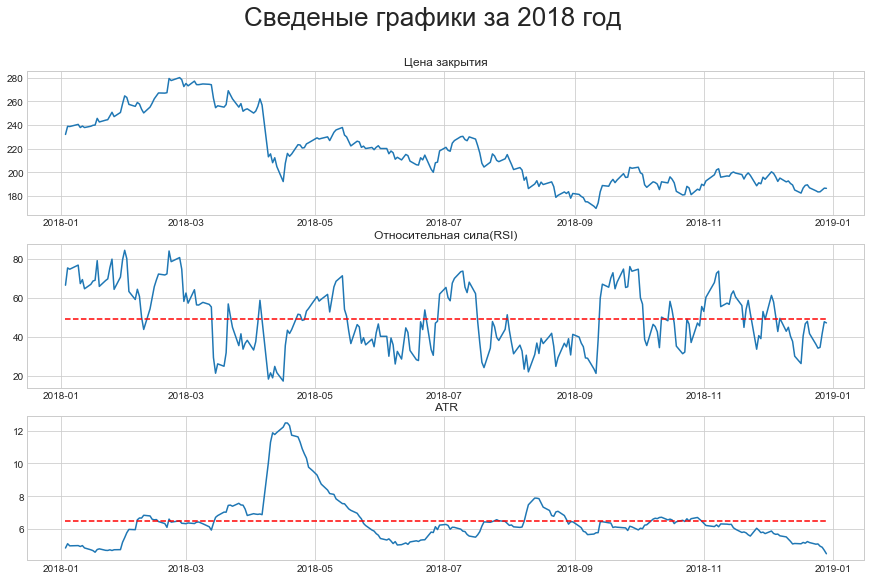

In [751]:
df_ATR = df.copy()
years = getYears(df)
cur_year = int(input('Введите год(доступны {}): '.format(years)))
period = int(input('Год, квартал месяц?[1/2/3]: '))

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(15,9))
fig.suptitle('Сведеные графики за {} год'.format(cur_year),fontsize=26)

if period != 1:
    if period == 2:
        fig.suptitle('Сведеные графики за {} год первый квартал'.format(cur_year),fontsize=26)
        period = 4
    if period == 3:
        fig.suptitle('Сведеные графики за {} год первый месяц'.format(cur_year),fontsize=26)
        period = 12
condition = (df_ATR['<DATE>']<pd.to_datetime(cur_year+1,format='%Y')) & (df_ATR['<DATE>']>pd.to_datetime(cur_year,format='%Y'))
df_cur = df_ATR[condition][:len(df_ATR)//period].copy()

df_cur['RSI_mean'] = df_cur['RSI'].mean()
df_cur['ATR_mean'] = df_cur['ATR'].mean()



ax = axes.flat
condition = (df_ATR['<DATE>']<pd.to_datetime(cur_year+1,format='%Y')) & (df_ATR['<DATE>']>pd.to_datetime(cur_year,format='%Y'))

# candlestick_ohlc(ax, zip(mdates.date2num(quotes.index.to_pydatetime()),
#                          quotes['Open'], quotes['High'],
#                          quotes['Low'], quotes['Close']),
#                  width=0.6)

ax[0].title.set_text('Цена закрытия')
ax[0].plot(df_cur['<CLOSE>'])

ax[1].title.set_text('Относительная сила(RSI)')
ax[1].plot(df_cur['RSI'])
ax[1].plot(df_cur['RSI_mean'],color = 'r',linestyle = '--')

ax[2].title.set_text('ATR')
ax[2].plot(df_cur['ATR'])
ax[2].plot(df_cur['ATR_mean'],color = 'r',linestyle = '--')

plt.show()



In [752]:
# primary_cash = 10000
cash = primary_cash #деньги
stack = 0 #кол-во акций
RSI_counterU = 0
RSI_counterD = 0
ATR_counterU = 0
ATR_counterD = 0
k_1 = 1/3#RSI
k_2 = 1/3#ATR
RSI_limit = 70
def buy(cash,price,share = 1):
    global stack
#     cash = cash-cash*share
    amount = (cash*share)//price
    cash = cash - amount*price
    stack += amount
    print('---Произошла покупка---')
    print('Денег на руках: ',cash,'  Цена: ',price,'Акций на руках:',stack)
    return cash

def sell(amount,price):
    global cash,stack
    cash += amount*price
    stack -= amount
    print('---Произошла продажа---')
    print('Денег на руках: ',cash,'  Цена: ', price,'  Осталось акций: ',stack)
    return cash

---Произошла покупка---
Денег на руках:  35.5   Цена:  255.5 Акций на руках: 39.0
---Произошла продажа---
Денег на руках:  9005.5   Цена:  230.0   Осталось акций:  0.0
---Произошла покупка---
Денег на руках:  0.5500000000010914   Цена:  192.35 Акций на руках: 47.0
---Произошла продажа---
Денег на руках:  9008.100000000002   Цена:  191.65   Осталось акций:  0.0


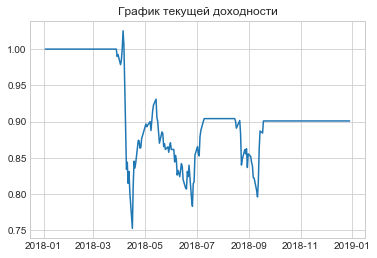

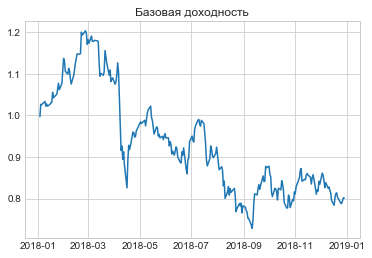

In [753]:
current_r = {}
base_r = {}
base_stack = cash//df_cur['<CLOSE>'][0]
for index, row in df_cur.iterrows():
    if (row['RSI']<row['RSI_mean']):
        RSI_counterD += 1
        RSI_counterU = 0
    else: 
        ATR_counterU = 0
        ATR_counterD += 1    
    if row['ATR']>row['ATR_mean']:
        ATR_counterD = 0
        ATR_counterU += 1
    else: 
        ATR_counterU = 0
        ATR_counterD += 1
    current_r[row['<DATE>']] =  (cash+stack*row['<CLOSE>'])/primary_cash
    base_r[row['<DATE>']] =  (base_stack*row['<CLOSE>'])/primary_cash
    if (RSI_counterD >= n*k_1) and (ATR_counterU >= n*k_2) and cash > row['<OPEN>']:
        cash = buy(cash,row['<OPEN>'])
    if (RSI_counterU >= n*k_2 or row['RSI']>RSI_limit) and (ATR_counterD >= n*k_1) and stack!=0:
        cash += sell(stack,row['<CLOSE>'])

plt.title('График текущей доходности')
data = pd.Series(current_r)
plt.plot(data)
plt.show()
plt.title('Базовая доходность')
data_base = pd.Series(base_r)
plt.plot(data_base)
plt.show()


In [738]:
cash


90.80000000000291

In [706]:
stack

67.0

In [707]:
r = (cash+stack*df_cur['<CLOSE>'][-1])/primary_cash
print('Доходность = ',r)

Доходность =  1.033256


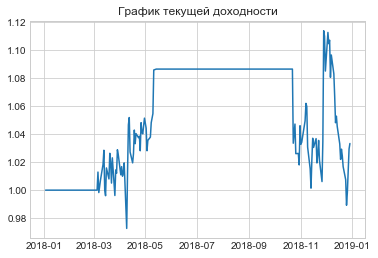

In [708]:
plt.title('График текущей доходности')
data = pd.Series(current_r)
plt.plot(data)

In [658]:
df_cur['ATR_mean']

<DATE>
2008-01-09    11.100754
2008-01-10    11.100754
2008-01-11    11.100754
2008-01-14    11.100754
2008-01-15    11.100754
                ...    
2008-12-25    11.100754
2008-12-26    11.100754
2008-12-29    11.100754
2008-12-30    11.100754
2008-12-31    11.100754
Name: ATR_mean, Length: 246, dtype: float64